In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using PyPlot

In [3]:
f(t, x) = -2t*x^2

f (generic function with 1 method)

In [6]:
#t0 = 0
#x0 = 1
#h = 0.25
#N = 10

function runge_kutta(t0, x0, h, N, f)
    t_actual = t0
    x_actual = x0
    
    ts = Float64[]
    xs = Float64[]
    
    for i in 1:h:N
        k1 = f(t_actual, x_actual)
        k2 = f(t_actual + 0.5h, x_actual + 0.5h*k1)
        k3 = f(t_actual + 0.5h, x_actual + 0.5h*k2)
        k4 = f(t_actual + h, x_actual + h*k3)

        t_nueva = t_actual + h
        x_nueva = x_actual + (h/6)*(k1 + 2k2 + 2k3 + k4)
        
        t_actual = t_nueva
        x_actual = x_nueva
        
        push!(ts, t_actual)
        push!(xs, x_actual)
    end
    ts, xs
    plot(ts, xs)   #questo plot solo è per funzioni nello spazio (x,y)
end

runge_kutta (generic function with 1 method)

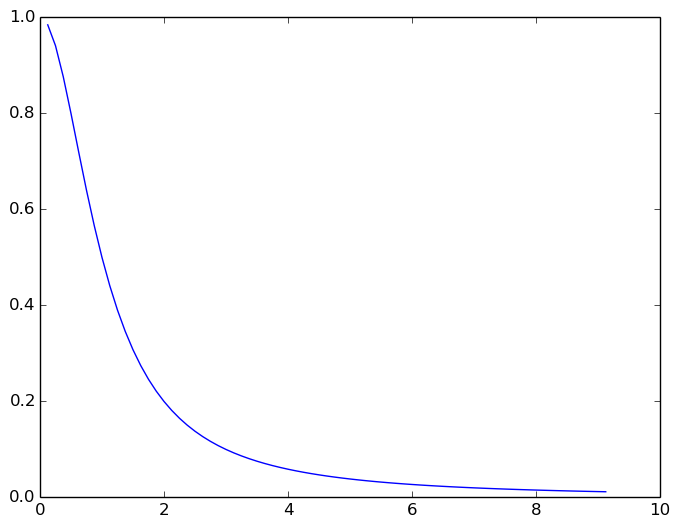

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f50c3a1d810>

In [7]:
runge_kutta(0, 1, 0.125, 10, f)

###Sistemi.

In [22]:
function esempio2(t, x0)
    x = x0[1]
    y = x0[2]
    return [y, -x + (1 - x^2)*y]
end

esempio2 (generic function with 1 method)

In [23]:
t0 = 0
x0 = [1, 1]
h = 0.25
N = 10

function runge_kutta_sistemas(t0, x0, h, N, f)
    
    t_attuale = t0
    x_attuale = x0
    
    ts = Float64[t_attuale]
    xs = Vector{Float64}[[x_attuale]]
    
    for i in 1:h:N
        
        k1 = f(t_attuale, x_attuale)
        k2 = f(t_attuale + 0.5h, x_attuale + 0.5h*k1)
        k3 = f(t_attuale + 0.5h, x_attuale + 0.5h*k2)
        k4 = f(t_attuale + h, x_attuale + h*k3)
        
        K = h*(k1 + 2k2 + 2k3 + k4)/6
        
        t_nuova = t_attuale + h
        x_nuova = x_attuale + K
        
        t_attuale = t_nuova
        x_attuale = x_nuova
        
        push!(ts, t_attuale)
        push!(xs, x_attuale)
    end
    ts, hcat(xs...)'
end

runge_kutta_sistemas (generic function with 1 method)

In [24]:
runge_kutta_sistemas(t0, x0, h, N, esempio2)

([0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25  …  7.0,7.25,7.5,7.75,8.0,8.25,8.5,8.75,9.0,9.25],
38x2 Array{Float64,2}:
  1.0          1.0      
  1.21189      0.673603 
  1.33118      0.279884 
  1.35521     -0.0770276
  1.29844     -0.366978 
  1.1755      -0.612134 
  0.992832    -0.851857 
  0.746422    -1.12951  
  0.421224    -1.48878  
 -0.00653535  -1.94569  
 -0.549849    -2.36627  
 -1.14877     -2.30374  
 -1.63363     -1.48695  
  ⋮                     
  1.96157      0.507085 
  2.00192     -0.107752 
  1.93322     -0.403441 
  1.81049     -0.564745 
  1.65395     -0.684933 
  1.46773     -0.807786 
  1.24751     -0.961425 
  0.982056    -1.17524  
  0.651688    -1.48797  
  0.226525    -1.93672  
 -0.324308    -2.46259  
 -0.978078    -2.65519  )

[Lentos](http://vk.com/video-10568504_128657235)

mi spiace, sto' festeggiando perche o' programma è andato bene (credo) :-)

se volete avere un disegno dello spazio delle fasi (in `2D`) potete cambiare il codigo accussi:

In [27]:
function runge_kutta_sistemas(t0, x0, h, N, f)
    
    t_attuale = t0
    x_attuale = x0
    
    ts = Float64[t_attuale]
    xs = Vector{Float64}[[x_attuale]]
    
    for i in 1:h:N
        
        k1 = f(t_attuale, x_attuale)
        k2 = f(t_attuale + 0.5h, x_attuale + 0.5h*k1)
        k3 = f(t_attuale + 0.5h, x_attuale + 0.5h*k2)
        k4 = f(t_attuale + h, x_attuale + h*k3)
        
        K = h*(k1 + 2k2 + 2k3 + k4)/6
        
        t_nuova = t_attuale + h
        x_nuova = x_attuale + K
        
        t_attuale = t_nuova
        x_attuale = x_nuova
        
        push!(ts, t_attuale)
        push!(xs, x_attuale)
    end
    nuovi_xs = hcat(xs...)'
    X = nuovi_xs[:, 1]
    Y = nuovi_xs[:, 2]
    
    plot(X,Y)
    title("Spazio delle fasi.")
    xlabel(L"y(t)")
    ylabel(L"x(t)")
end

runge_kutta_sistemas (generic function with 1 method)

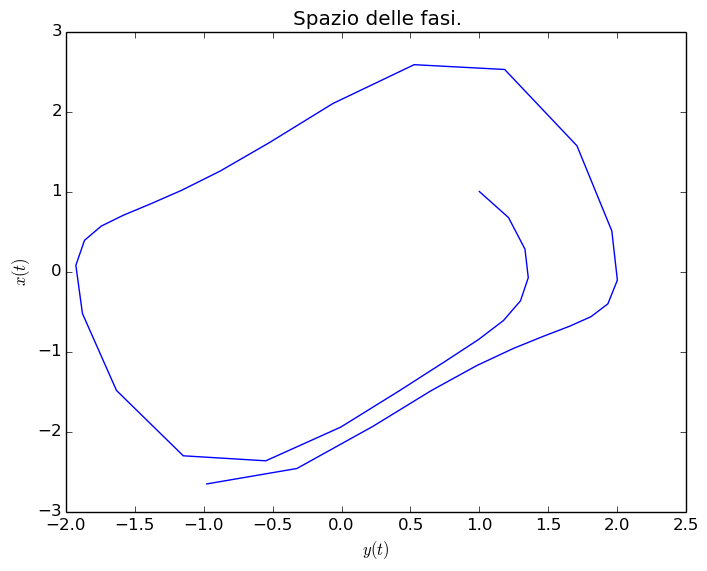

PyObject <matplotlib.text.Text object at 0x7f50bf4fd0d0>

In [28]:
runge_kutta_sistemas(t0, x0, h, N, esempio2)

Vi ho detto che la equazione usata nell'esempio 2 si chiama "Equazione di Van der Pol" per Balthasar Van der Pol.